In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=.0000000354, optimizer='sgd', loss='mae', scale=1e9, early_stop=False, target_stop=2)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 129.50502
epoch  1 --- Loss --- 129.49942
epoch  2 --- Loss --- 129.49382
epoch  3 --- Loss --- 129.48822
epoch  4 --- Loss --- 129.48262
epoch  5 --- Loss --- 129.47702
epoch  6 --- Loss --- 129.4714
epoch  7 --- Loss --- 129.4658
epoch  8 --- Loss --- 129.4602
epoch  9 --- Loss --- 129.4546
epoch  10 --- Loss --- 129.449
epoch  11 --- Loss --- 129.4434
epoch  12 --- Loss --- 129.4378
epoch  13 --- Loss --- 129.4322
epoch  14 --- Loss --- 129.42659
epoch  15 --- Loss --- 129.42099
epoch  16 --- Loss --- 129.41539
epoch  17 --- Loss --- 129.40979
epoch  18 --- Loss --- 129.40419
epoch  19 --- Loss --- 129.39859
epoch  20 --- Loss --- 129.39299
epoch  21 --- Loss --- 129.38737
epoch  22 --- Loss --- 129.38177
epoch  23 --- Loss --- 129.37617
epoch  24 --- Loss --- 129.37057
epoch  25 --- Loss --- 129.36497
epoch  26 --- Loss --- 129.35938
epoch  27 --- Loss --- 129.35376
epoch  28 --- Loss --- 129.34816
epoch  29 --- Loss --- 129.34256
epoch  30 --- Loss --- 129.33

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 69.32518434524536 minutes


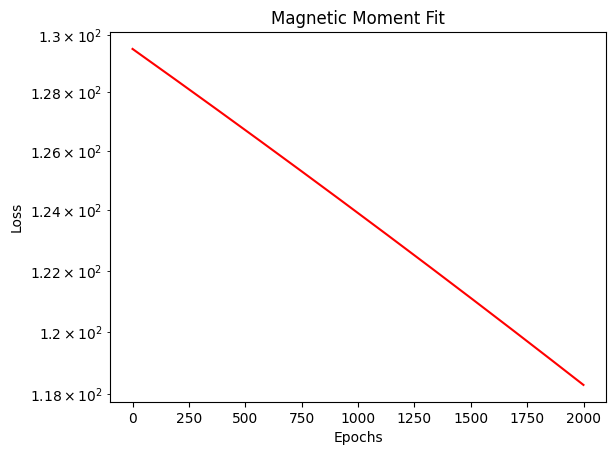

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[-0.05724283 -0.0872306   0.06080014]]
Value:     [[0.0917845  0.03572132 0.13613486]]
---- Moment  1 -----
Position:  [[-0.02568833  0.02674964 -0.05461604]]
Value:     [[ 0.00276318  0.09656803 -0.02086806]]
---- Moment  2 -----
Position:  [[ 0.06124432 -0.00310695  0.04142173]]
Value:     [[0.04789368 0.02550644 0.09002378]]
